# Estudi KMeans

## Lectura fitxer students

In [72]:
import pandas as pd

df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis = 1)

In [5]:
df['target'] = df['stai_t'] + df['cesd']
df = df.drop(['stai_t', 'cesd'], axis=1)

In [6]:
X = df.drop('target', axis=1)
y = df['target']

## Aplicació model

### Utilització de totes les característiques
Fent 2 agrupacions per determinar si necessiten o no assitència mèdica. 

In [52]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df_num_scaled = scaler.fit_transform(df)

In [16]:
n_grups=2
model = KMeans(n_clusters=n_grups)
clusters = model.fit_predict(X)

c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [17]:
df_clustered = X.copy() 
df_clustered['cluster'] = clusters 
df_clustered.head(5) 

,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,mbi_ex,mbi_cy,mbi_ea,cluster
0,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,17,13,20,1
1,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,14,11,26,0
2,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,24,7,23,0
3,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,16,10,21,0
4,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,22,14,23,0


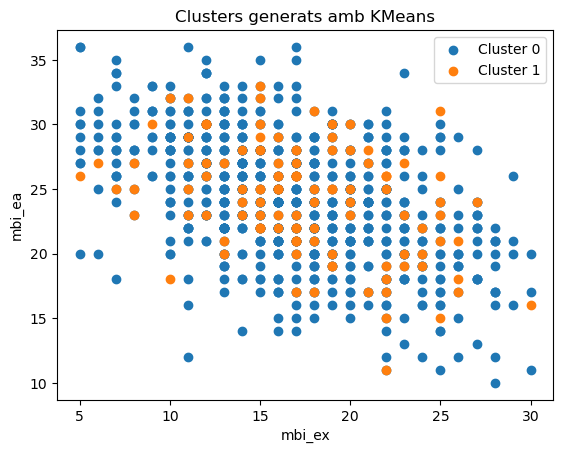

In [19]:
# Plot dels punts amb diferents colors segons el cluster al qual pertanyen
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['mbi_ea'], label=f'Cluster {i}')

plt.title('Clusters generats amb KMeans')
plt.xlabel('mbi_ex')
plt.ylabel('mbi_ea')
plt.legend()
plt.show()

In [20]:
# Grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('cluster')
cluster_properties = cluster_grouped.mean()

# Printing the properties of each cluster (mean values of the variables)
print(cluster_properties)

               age      year       sex      glang      part       job  \
cluster                                                                 
0        22.359638  3.169470  1.694696   2.241915  0.573092  0.360931   
1        22.548673  2.646018  1.699115  97.000000  0.495575  0.265487   

            stud_h    health      psyt        jspe   qcae_cog   qcae_aff  \
cluster                                                                    
0        24.936611  3.783959  0.231565  106.712807  58.703752  34.971539   
1        27.699115  3.734513  0.176991  104.061947  57.309735  33.504425   

              amsp  erec_mean     mbi_ex     mbi_cy     mbi_ea  
cluster                                                         
0        23.241915   0.723064  16.813713  10.024580  24.209573  
1        22.522124   0.700169  17.318584  10.451327  24.194690  


In [21]:
# Getting the number of patients in each cluster
total_cluster = cluster_grouped.size()
total_cluster

cluster
0    773
1    113
dtype: int64

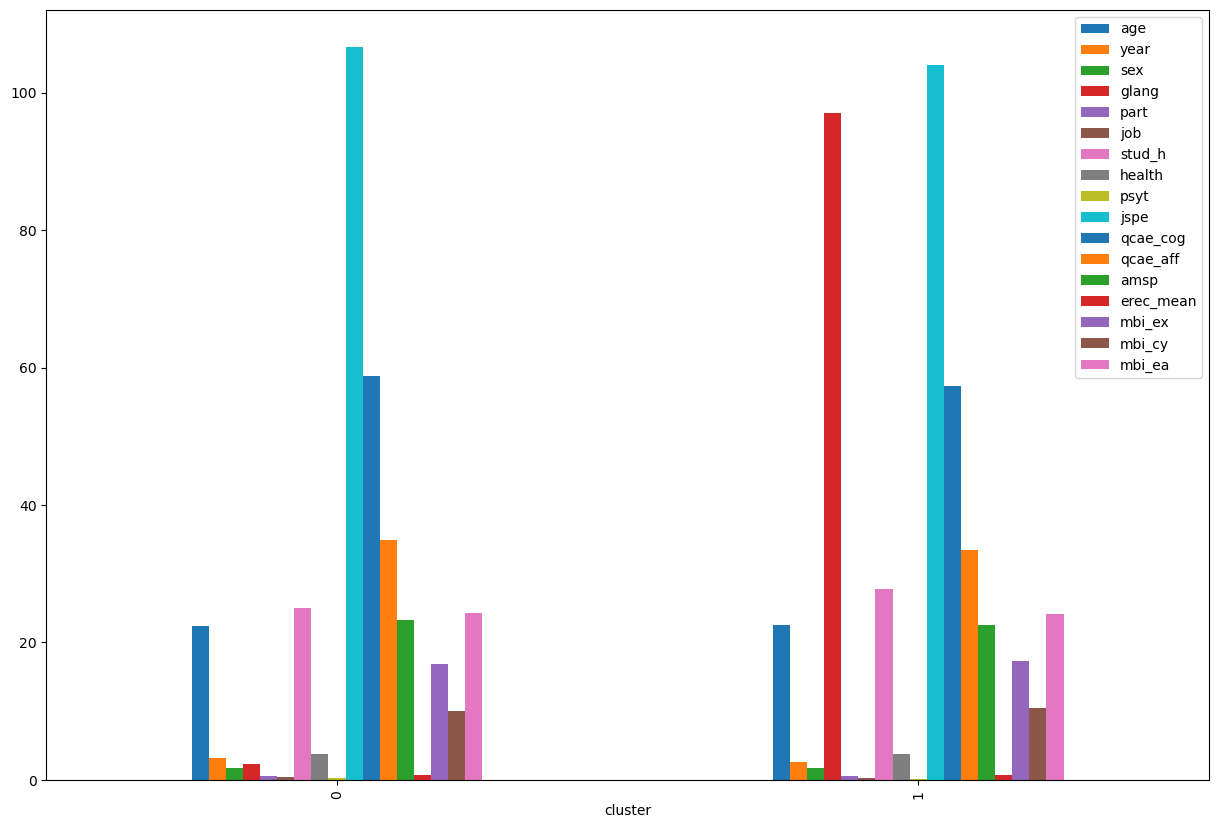

In [22]:
cluster_properties.plot(kind='bar', figsize=(15, 10))
plt.show()

**Comentari**


#### Avaluació model

Definim un _threshold_ per determinar a quin punt considerem que la persona en qüestió pateix ansietat o depressió, tenint en compte que la nostra _y_ és la suma de *escala de depressió* i *escala d'ansiestat*. Aquestes dues es mouen en l'interval:
* cesd: 0 a 56 
* stai_t: 20 a 77


In [24]:
cesd_max = 56
stai_t_max = 77
threshold = (cesd_max+stai_t_max)*0.6
threshold

79.8

In [25]:
# fem Dataset per avaluar el model 
df_aval = df_clustered.copy() 
df_aval['target'] = y
df_aval

,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,mbi_ex,mbi_cy,mbi_ea,cluster,target
0,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,17,13,20,1,95
1,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,14,11,26,0,40
2,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,24,7,23,0,98
3,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,16,10,21,0,65
4,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,22,14,23,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,21,2,1,1,1,0,45,3,0,106,63,39,28,0.619048,23,4,34,0,80
882,20,2,2,1,0,0,13,3,0,113,67,40,21,0.809524,17,5,24,0,67
883,19,1,1,1,0,0,50,5,0,100,50,31,24,0.547619,15,8,31,0,59
884,24,5,2,1,0,0,20,2,1,120,64,39,21,0.785714,22,15,19,0,91


In [26]:
# Filtrem les files amb 'target' superior a threshold
df_target_gt_threshold = df_aval[df_aval['target'] > threshold]

# Fem el recompte agrupant per 'cluster'
count_by_cluster = df_target_gt_threshold.groupby('cluster').size()

# Mostrem el resultat
print("Recompte estudiants que necessiten ajuda\n", count_by_cluster)

print("\nRecompte estudiants totals en cluster\n", total_cluster)

Recompte estudiants que necessiten ajuda
 cluster
0    151
1     28
dtype: int64

Recompte estudiants totals en cluster
 cluster
0    773
1    113
dtype: int64


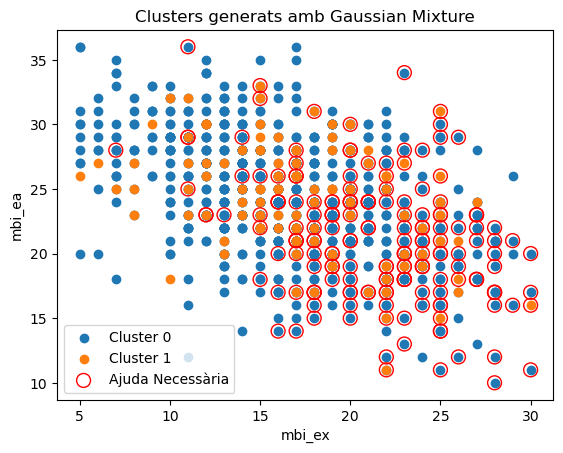

In [27]:
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['mbi_ea'], label=f'Cluster {i}')

# Plot dels punts que superen el llindar amb marques diferents (per exemple, cercles buits)
plt.scatter(df_target_gt_threshold['mbi_ex'], df_target_gt_threshold['mbi_ea'], label='Ajuda Necessària', facecolors='none', edgecolors='r', marker='o', s=100)

plt.title('Clusters generats amb Gaussian Mixture')
plt.xlabel('mbi_ex')
plt.ylabel('mbi_ea')
plt.legend()
plt.show()

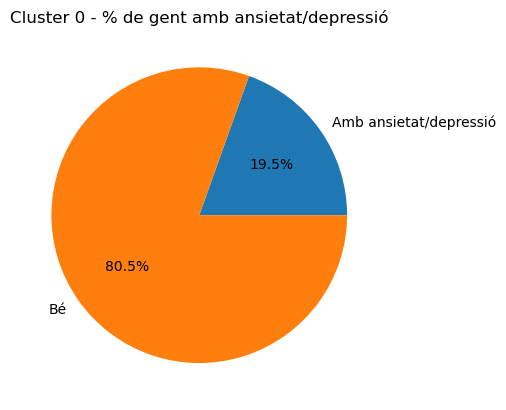

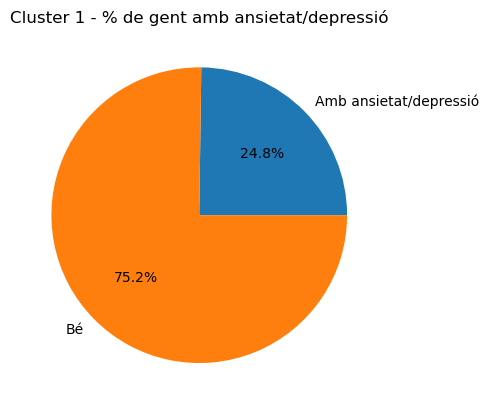

In [28]:
labels = 'Amb ansietat/depressió', 'Bé'
dades = []
for c in range(n_grups):
    resta = total_cluster[c] - count_by_cluster[c]
    dades.append([count_by_cluster[c], resta])

for i, d in enumerate(dades):
    fig, ax = plt.subplots()
    ax.pie(d, labels=labels, autopct='%1.1f%%')
    ax.set_title(f'Cluster {i} - % de gent amb ansietat/depressió')
    plt.show()

**Conclusions**


### Utilització de les característiques més rellevants
Fent 2 agrupacions per determinar si necessiten o no assitència mèdica. 

#### Random forest

Recordem que els coeficients amb Random Forest dels diferents atributs eren:

|    | atribut   | importancia |
|----|-----------|-------------|
| 9  | jspe      | 0.086444    |
| 10 | qcae_cog  | 0.084919    |
| 6  | stud_h    | 0.084754    |
| 11 | qcae_aff  | 0.082221    |
| 14 | mbi_ex    | 0.079569    |
| 12 | amsp      | 0.079371    |
| 13 | erec_mean | 0.078246    |
| 16 | mbi_ea    | 0.078138    |
| 15 | mbi_cy    | 0.073213    |
| 0  | age       | 0.067432    |
| 1  | year      | 0.048998    |
| 7  | health    | 0.041126    |
| 3  | glang     | 0.027404    |
| 4  | part      | 0.026077    |
| 5  | job       | 0.022708    |
| 2  | sex       | 0.021316    |
| 8  | psyt      | 0.018066    |

Per fer aquesta part ens quedarem els atributs que tenen l'importància major a **0.060000**

In [46]:
import pandas as pd

df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis = 1)
df['target'] = df['stai_t'] + df['cesd']
df = df.drop(['stai_t', 'cesd'], axis=1)
X = df.drop('target', axis=1)
y = df['target']

In [30]:
# X Random Forest
X_rf = X[['jspe', 'qcae_cog', 'stud_h', 'qcae_aff', 'mbi_ex', 'amsp', 'erec_mean', 'mbi_ea', 'mbi_cy', 'age']]

In [31]:
n_grups=2
model = KMeans(n_clusters=n_grups)
clusters = model.fit_predict(X)

c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [32]:
df_clustered = X_rf.copy() 
df_clustered['cluster'] = clusters 
df_clustered.head(5) 

,jspe,qcae_cog,stud_h,qcae_aff,mbi_ex,amsp,erec_mean,mbi_ea,mbi_cy,age,cluster
0,88,62,56,27,17,17,0.738095,20,13,18,1
1,109,55,20,37,14,22,0.690476,26,11,26,0
2,106,64,36,39,24,17,0.690476,23,7,21,0
3,101,52,51,33,16,18,0.833333,21,10,21,0
4,102,58,22,28,22,21,0.690476,23,14,21,0


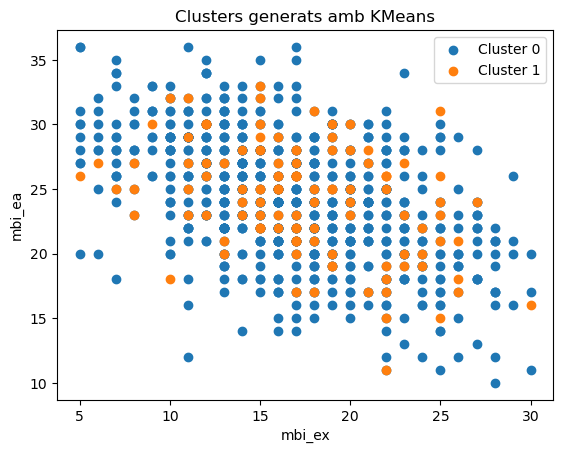

In [34]:
# Plot dels punts amb diferents colors segons el cluster al qual pertanyen
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['mbi_ea'], label=f'Cluster {i}')

plt.title('Clusters generats amb KMeans')
plt.xlabel('mbi_ex')
plt.ylabel('mbi_ea')
plt.legend()
plt.show()

In [35]:
# Grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('cluster')
cluster_properties = cluster_grouped.mean()

# Printing the properties of each cluster (mean values of the variables)
print(cluster_properties)

               jspe   qcae_cog     stud_h   qcae_aff     mbi_ex       amsp  \
cluster                                                                      
0        106.712807  58.703752  24.936611  34.971539  16.813713  23.241915   
1        104.061947  57.309735  27.699115  33.504425  17.318584  22.522124   

         erec_mean     mbi_ea     mbi_cy        age  
cluster                                              
0         0.723064  24.209573  10.024580  22.359638  
1         0.700169  24.194690  10.451327  22.548673  


In [36]:
# Getting the number of patients in each cluster
total_cluster = cluster_grouped.size()
total_cluster

cluster
0    773
1    113
dtype: int64

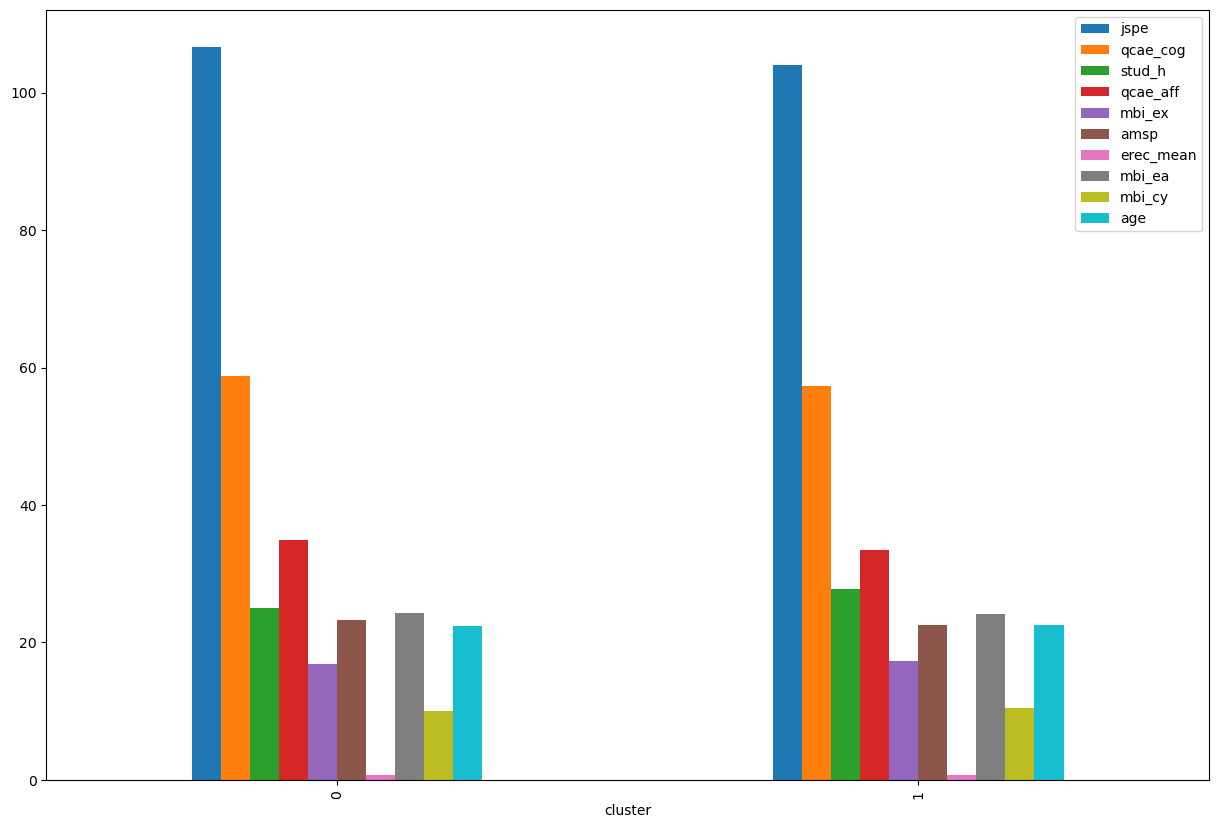

In [37]:
cluster_properties.plot(kind='bar', figsize=(15, 10))
plt.show()

##### Avaluació model

In [38]:
cesd_max = 56
stai_t_max = 77
threshold = (cesd_max+stai_t_max)*0.6
threshold

79.8

In [44]:
# fem Dataset per avaluar el model 
df_aval = df_clustered.copy() 
df_aval['target'] = y
df_aval

,jspe,qcae_cog,stud_h,qcae_aff,mbi_ex,amsp,erec_mean,mbi_ea,mbi_cy,age,cluster,target
0,88,62,56,27,17,17,0.738095,20,13,18,1,95
1,109,55,20,37,14,22,0.690476,26,11,26,0,40
2,106,64,36,39,24,17,0.690476,23,7,21,0,98
3,101,52,51,33,16,18,0.833333,21,10,21,0,65
4,102,58,22,28,22,21,0.690476,23,14,21,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...
881,106,63,45,39,23,28,0.619048,34,4,21,0,80
882,113,67,13,40,17,21,0.809524,24,5,20,0,67
883,100,50,50,31,15,24,0.547619,31,8,19,0,59
884,120,64,20,39,22,21,0.785714,19,15,24,0,91


In [40]:
# Filtrem les files amb 'target' superior a threshold
df_target_gt_threshold = df_aval[df_aval['target'] > threshold]

# Fem el recompte agrupant per 'cluster'
count_by_cluster = df_target_gt_threshold.groupby('cluster').size()

# Mostrem el resultat
print("Recompte estudiants que necessiten ajuda\n", count_by_cluster)

print("\nRecompte estudiants totals en cluster\n", total_cluster)

Recompte estudiants que necessiten ajuda
 cluster
0    151
1     28
dtype: int64

Recompte estudiants totals en cluster
 cluster
0    773
1    113
dtype: int64


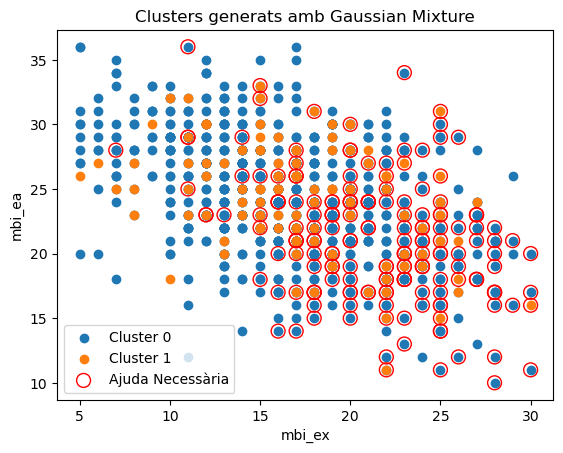

In [41]:
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['mbi_ea'], label=f'Cluster {i}')

# Plot dels punts que superen el llindar amb marques diferents (per exemple, cercles buits)
plt.scatter(df_target_gt_threshold['mbi_ex'], df_target_gt_threshold['mbi_ea'], label='Ajuda Necessària', facecolors='none', edgecolors='r', marker='o', s=100)

plt.title('Clusters generats amb Gaussian Mixture')
plt.xlabel('mbi_ex')
plt.ylabel('mbi_ea')
plt.legend()
plt.show()

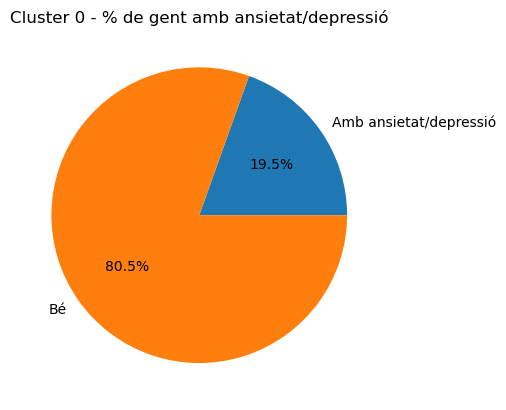

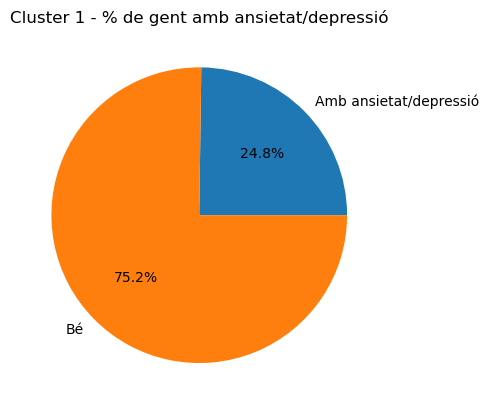

In [42]:
labels = 'Amb ansietat/depressió', 'Bé'
dades = []
for c in range(n_grups):
    resta = total_cluster[c] - count_by_cluster[c]
    dades.append([count_by_cluster[c], resta])

for i, d in enumerate(dades):
    fig, ax = plt.subplots()
    ax.pie(d, labels=labels, autopct='%1.1f%%')
    ax.set_title(f'Cluster {i} - % de gent amb ansietat/depressió')
    plt.show()

#### Random forest II

Recordem que els coeficients amb Random Forest dels atributs que hem tingut en compte abans:

|    | atribut   | importancia |
|----|-----------|-------------|
| 9  | jspe      | 0.086444    |
| 10 | qcae_cog  | 0.084919    |
| 6  | stud_h    | 0.084754    |
| 11 | qcae_aff  | 0.082221    |
| 14 | mbi_ex    | 0.079569    |
| 12 | amsp      | 0.079371    |
| 13 | erec_mean | 0.078246    |
| 16 | mbi_ea    | 0.078138    |
| 15 | mbi_cy    | 0.073213    |
| 0  | age       | 0.067432    |

Ara agafarem els atributs amb importància major a **0.080000**

In [1]:
import pandas as pd

df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis = 1)
df['target'] = df['stai_t'] + df['cesd']
df = df.drop(['stai_t', 'cesd'], axis=1)
X = df.drop('target', axis=1)
y = df['target']

In [2]:
# X Random Forest
X_rf = X[['jspe', 'qcae_cog', 'stud_h', 'qcae_aff']]

In [9]:
n_grups=2
model = KMeans(n_clusters=n_grups)
clusters = model.fit_predict(X)

c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [10]:
df_clustered = X_rf.copy() 
df_clustered['cluster'] = clusters 
df_clustered.head(5) 

,jspe,qcae_cog,stud_h,qcae_aff,cluster
0,88,62,56,27,1
1,109,55,20,37,0
2,106,64,36,39,0
3,101,52,51,33,0
4,102,58,22,28,0


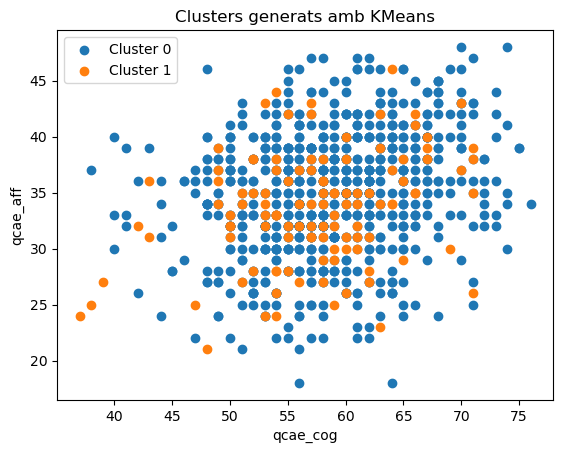

In [12]:
# Plot dels punts amb diferents colors segons el cluster al qual pertanyen
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['qcae_cog'], cluster_points['qcae_aff'], label=f'Cluster {i}')

plt.title('Clusters generats amb KMeans')
plt.xlabel('qcae_cog')
plt.ylabel('qcae_aff')
plt.legend()
plt.show()

In [13]:
# Grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('cluster')
cluster_properties = cluster_grouped.mean()

# Printing the properties of each cluster (mean values of the variables)
print(cluster_properties)

               jspe   qcae_cog     stud_h   qcae_aff
cluster                                             
0        106.712807  58.703752  24.936611  34.971539
1        104.061947  57.309735  27.699115  33.504425


In [14]:
# Getting the number of patients in each cluster
total_cluster = cluster_grouped.size()
total_cluster

cluster
0    773
1    113
dtype: int64

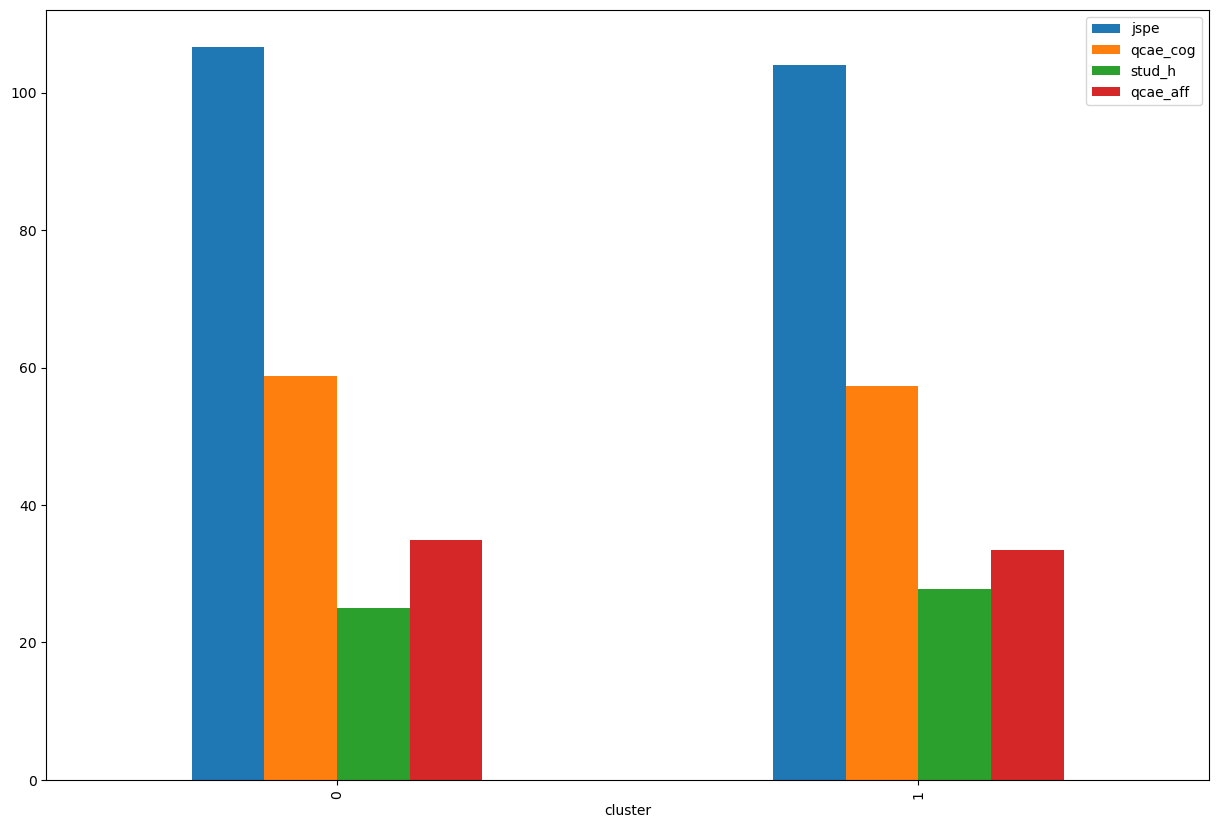

In [15]:
cluster_properties.plot(kind='bar', figsize=(15, 10))
plt.show()

##### Avaluació model

In [16]:
cesd_max = 56
stai_t_max = 77
threshold = (cesd_max+stai_t_max)*0.6
threshold

79.8

In [17]:
# fem Dataset per avaluar el model 
df_aval = df_clustered.copy() 
df_aval['target'] = y
df_aval

,jspe,qcae_cog,stud_h,qcae_aff,cluster,target
0,88,62,56,27,1,95
1,109,55,20,37,0,40
2,106,64,36,39,0,98
3,101,52,51,33,0,65
4,102,58,22,28,0,60
...,...,...,...,...,...,...
881,106,63,45,39,0,80
882,113,67,13,40,0,67
883,100,50,50,31,0,59
884,120,64,20,39,0,91


In [18]:
# Filtrem les files amb 'target' superior a threshold
df_target_gt_threshold = df_aval[df_aval['target'] > threshold]

# Fem el recompte agrupant per 'cluster'
count_by_cluster = df_target_gt_threshold.groupby('cluster').size()

# Mostrem el resultat
print("Recompte estudiants que necessiten ajuda\n", count_by_cluster)

print("\nRecompte estudiants totals en cluster\n", total_cluster)

Recompte estudiants que necessiten ajuda
 cluster
0    151
1     28
dtype: int64

Recompte estudiants totals en cluster
 cluster
0    773
1    113
dtype: int64


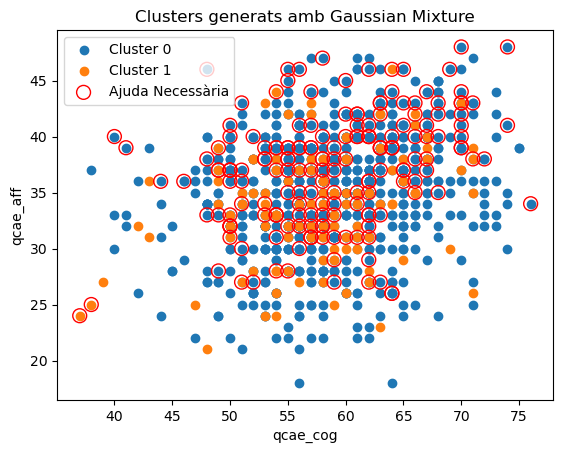

In [19]:
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['qcae_cog'], cluster_points['qcae_aff'], label=f'Cluster {i}')

# Plot dels punts que superen el llindar amb marques diferents (per exemple, cercles buits)
plt.scatter(df_target_gt_threshold['qcae_cog'], df_target_gt_threshold['qcae_aff'], label='Ajuda Necessària', facecolors='none', edgecolors='r', marker='o', s=100)

plt.title('Clusters generats amb Gaussian Mixture')
plt.xlabel('qcae_cog')
plt.ylabel('qcae_aff')
plt.legend()
plt.show()

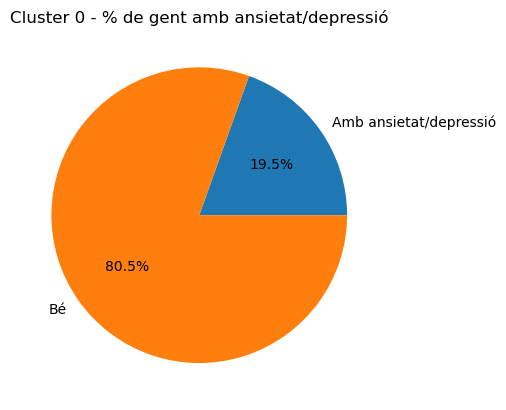

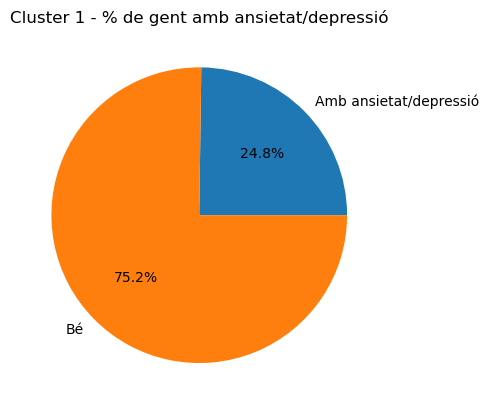

In [20]:
labels = 'Amb ansietat/depressió', 'Bé'
dades = []
for c in range(n_grups):
    resta = total_cluster[c] - count_by_cluster[c]
    dades.append([count_by_cluster[c], resta])

for i, d in enumerate(dades):
    fig, ax = plt.subplots()
    ax.pie(d, labels=labels, autopct='%1.1f%%')
    ax.set_title(f'Cluster {i} - % de gent amb ansietat/depressió')
    plt.show()

#### Linear Regression

Ara en comptes de fer la redddució de característiques amb Random Forest, utilitzem els coeficients obtinguts després d'haver aplicat Linear Regression. 

Recordem que els coeficients amb Linear Regression dels diferents atributs eren:
|    | Feature   | Coefficient |
|----|-----------|-------------|
| 8  | psyt      | 7.979258    |
| 2  | sex       | 4.281193    |
| 13 | erec_mean | 2.110597    |
| 14 | mbi_ex    | 1.319494    |
| 11 | qcae_aff  | 0.742631    |
| 0  | age       | 0.380706    |
| 15 | mbi_cy    | 0.224846    |
| 6  | stud_h    | 0.124795    |
| 3  | glang     | 0.052498    |
| 10 | qcae_cog  | -0.039671   |
| 9  | jspe      | -0.168637   |
| 12 | amsp      | -0.382934   |
| 16 | mbi_ea    | -1.007413   |
| 1  | year      | -1.074211   |
| 5  | job       | -1.184904   |
| 4  | part      | -1.968074   |
| 7  | health    | -3.010553   |

Per fer aquesta part ens quedarem els atributs que tenen l'importància major a **0.100000**

In [62]:
import pandas as pd

df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis = 1)
df['target'] = df['stai_t'] + df['cesd']
df = df.drop(['stai_t', 'cesd'], axis=1)
X = df.drop('target', axis=1)
y = df['target']

In [63]:
# X Linear Regression
X_lr = X[['psyt', 'sex', 'erec_mean', 'mbi_ex', 'qcae_aff', 'age', 'mbi_cy', 'stud_h']]

In [64]:
n_grups=2
model = KMeans(n_clusters=n_grups)
clusters = model.fit_predict(X)

c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [65]:
df_clustered = X_lr.copy() 
df_clustered['cluster'] = clusters 
df_clustered.head(5) 

,psyt,sex,erec_mean,mbi_ex,qcae_aff,age,mbi_cy,stud_h,cluster
0,0,1,0.738095,17,27,18,13,56,0
1,0,1,0.690476,14,37,26,11,20,1
2,0,2,0.690476,24,39,21,7,36,1
3,0,2,0.833333,16,33,21,10,51,1
4,0,1,0.690476,22,28,21,14,22,1


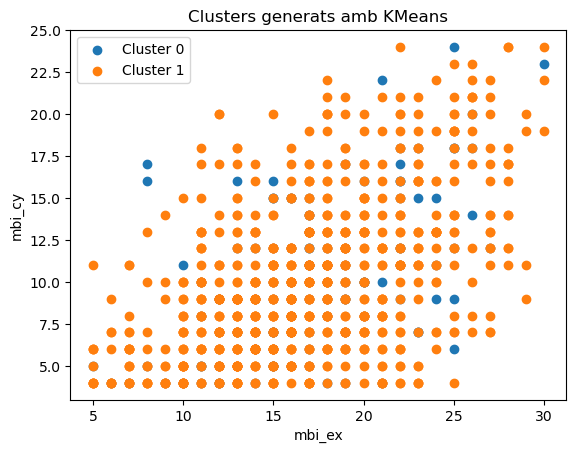

In [66]:
# Plot dels punts amb diferents colors segons el cluster al qual pertanyen
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['mbi_cy'], label=f'Cluster {i}')

plt.title('Clusters generats amb KMeans')
plt.xlabel('mbi_ex')
plt.ylabel('mbi_cy')
plt.legend()
plt.show()

In [67]:
# Grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('cluster')
cluster_properties = cluster_grouped.mean()

# Printing the properties of each cluster (mean values of the variables)
print(cluster_properties)

             psyt       sex  erec_mean     mbi_ex   qcae_aff        age  \
cluster                                                                   
0        0.176991  1.699115   0.700169  17.318584  33.504425  22.548673   
1        0.231565  1.694696   0.723064  16.813713  34.971539  22.359638   

            mbi_cy     stud_h  
cluster                        
0        10.451327  27.699115  
1        10.024580  24.936611  


In [68]:
# Getting the number of patients in each cluster
total_cluster = cluster_grouped.size()
total_cluster

cluster
0    113
1    773
dtype: int64

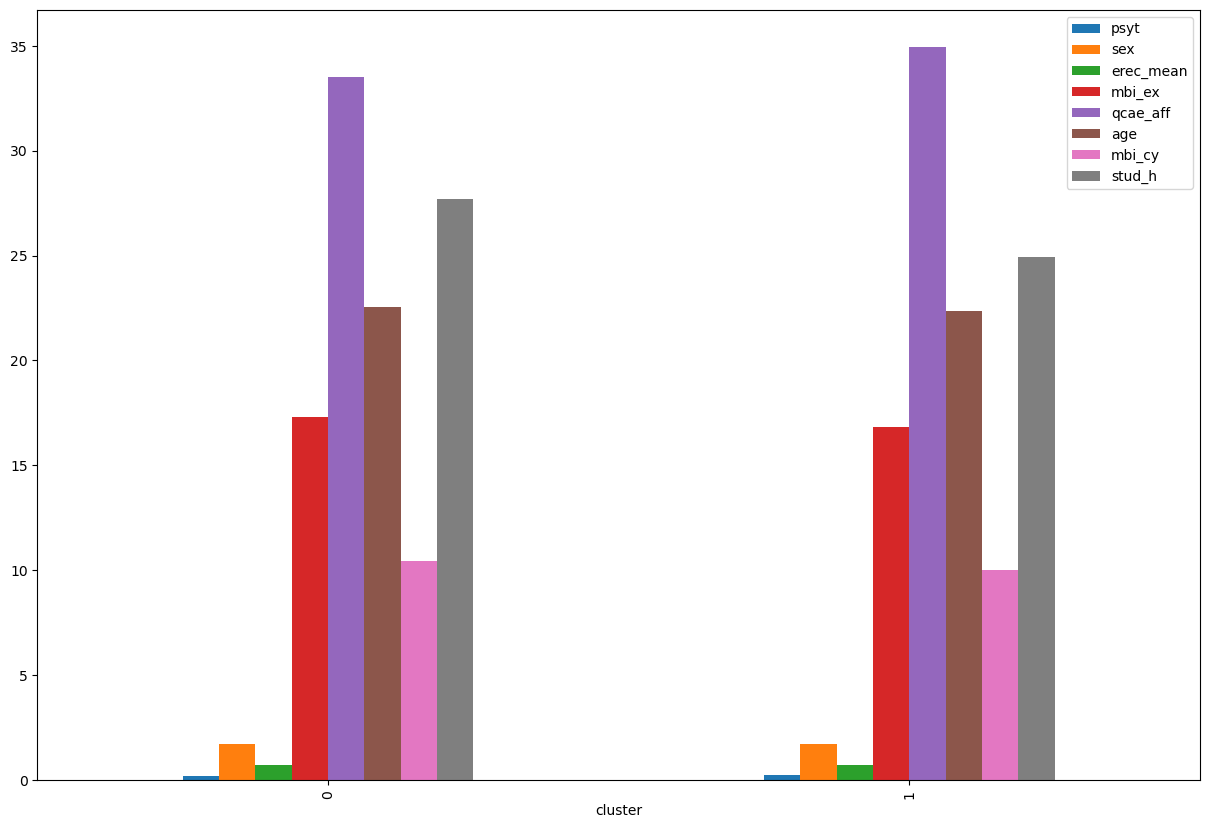

In [69]:
cluster_properties.plot(kind='bar', figsize=(15, 10))
plt.show()

##### Avaluació model

In [70]:
cesd_max = 56
stai_t_max = 77
threshold = (cesd_max+stai_t_max)*0.6
threshold

79.8

In [71]:
# fem Dataset per avaluar el model 
df_aval = df_clustered.copy() 
df_aval['target'] = y
df_aval

,psyt,sex,erec_mean,mbi_ex,qcae_aff,age,mbi_cy,stud_h,cluster,target
0,0,1,0.738095,17,27,18,13,56,0,95
1,0,1,0.690476,14,37,26,11,20,1,40
2,0,2,0.690476,24,39,21,7,36,1,98
3,0,2,0.833333,16,33,21,10,51,1,65
4,0,1,0.690476,22,28,21,14,22,1,60
...,...,...,...,...,...,...,...,...,...,...
881,0,1,0.619048,23,39,21,4,45,1,80
882,0,2,0.809524,17,40,20,5,13,1,67
883,0,1,0.547619,15,31,19,8,50,1,59
884,1,2,0.785714,22,39,24,15,20,1,91


In [72]:
# Filtrem les files amb 'target' superior a threshold
df_target_gt_threshold = df_aval[df_aval['target'] > threshold]

# Fem el recompte agrupant per 'cluster'
count_by_cluster = df_target_gt_threshold.groupby('cluster').size()

# Mostrem el resultat
print("Recompte estudiants que necessiten ajuda\n", count_by_cluster)

print("\nRecompte estudiants totals en cluster\n", total_cluster)

Recompte estudiants que necessiten ajuda
 cluster
0     28
1    151
dtype: int64

Recompte estudiants totals en cluster
 cluster
0    113
1    773
dtype: int64


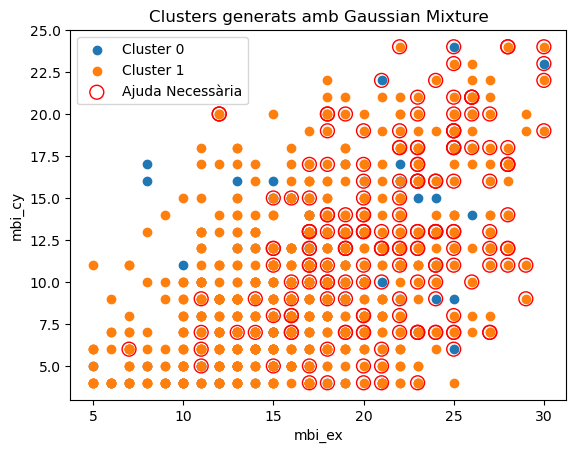

In [73]:
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['mbi_cy'], label=f'Cluster {i}')

# Plot dels punts que superen el llindar amb marques diferents (per exemple, cercles buits)
plt.scatter(df_target_gt_threshold['mbi_ex'], df_target_gt_threshold['mbi_cy'], label='Ajuda Necessària', facecolors='none', edgecolors='r', marker='o', s=100)

plt.title('Clusters generats amb Gaussian Mixture')
plt.xlabel('mbi_ex')
plt.ylabel('mbi_cy')
plt.legend()
plt.show()

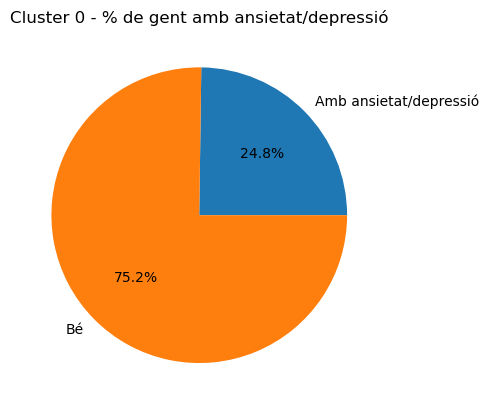

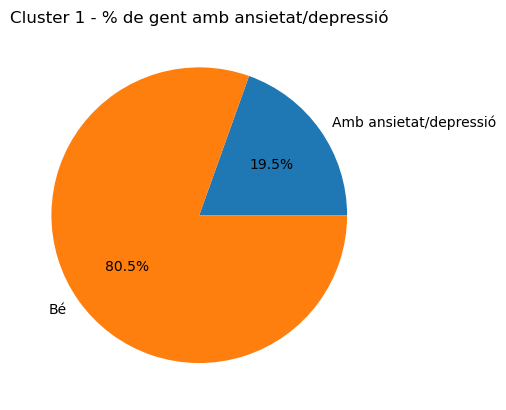

In [74]:
labels = 'Amb ansietat/depressió', 'Bé'
dades = []
for c in range(n_grups):
    resta = total_cluster[c] - count_by_cluster[c]
    dades.append([count_by_cluster[c], resta])

for i, d in enumerate(dades):
    fig, ax = plt.subplots()
    ax.pie(d, labels=labels, autopct='%1.1f%%')
    ax.set_title(f'Cluster {i} - % de gent amb ansietat/depressió')
    plt.show()

#### Linear Regression II

Recordem que els coeficients amb Linear Regression dels atributs que hem tingut en compte abans:

|    | Feature   | Coefficient |
|----|-----------|-------------|
| 8  | psyt      | 7.979258    |
| 2  | sex       | 4.281193    |
| 13 | erec_mean | 2.110597    |
| 14 | mbi_ex    | 1.319494    |
| 11 | qcae_aff  | 0.742631    |
| 0  | age       | 0.380706    |
| 15 | mbi_cy    | 0.224846    |
| 6  | stud_h    | 0.124795    |

Ara ens quedarem els atributs que tenen l'importància major a **1.000000**

In [37]:
import pandas as pd

df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis = 1)
df['target'] = df['stai_t'] + df['cesd']
df = df.drop(['stai_t', 'cesd'], axis=1)
X = df.drop('target', axis=1)
y = df['target']

In [38]:
# X Linear Regression
X_lr = X[['psyt', 'sex', 'erec_mean', 'mbi_ex']]

In [39]:
n_grups=2
model = KMeans(n_clusters=n_grups)
clusters = model.fit_predict(X)

c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [40]:
df_clustered = X_lr.copy() 
df_clustered['cluster'] = clusters 
df_clustered.head(5) 

,psyt,sex,erec_mean,mbi_ex,cluster
0,0,1,0.738095,17,1
1,0,1,0.690476,14,0
2,0,2,0.690476,24,0
3,0,2,0.833333,16,0
4,0,1,0.690476,22,0


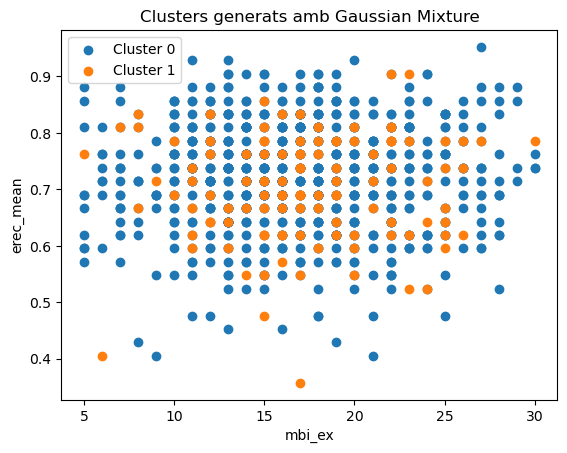

In [41]:
# Plot dels punts amb diferents colors segons el cluster al qual pertanyen
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['erec_mean'], label=f'Cluster {i}')

plt.title('Clusters generats amb Gaussian Mixture')
plt.xlabel('mbi_ex')
plt.ylabel('erec_mean')
plt.legend()
plt.show()

In [42]:
# Grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('cluster')
cluster_properties = cluster_grouped.mean()

# Printing the properties of each cluster (mean values of the variables)
print(cluster_properties)

             psyt       sex  erec_mean     mbi_ex
cluster                                          
0        0.231565  1.694696   0.723064  16.813713
1        0.176991  1.699115   0.700169  17.318584


In [43]:
# Getting the number of patients in each cluster
total_cluster = cluster_grouped.size()
total_cluster

cluster
0    773
1    113
dtype: int64

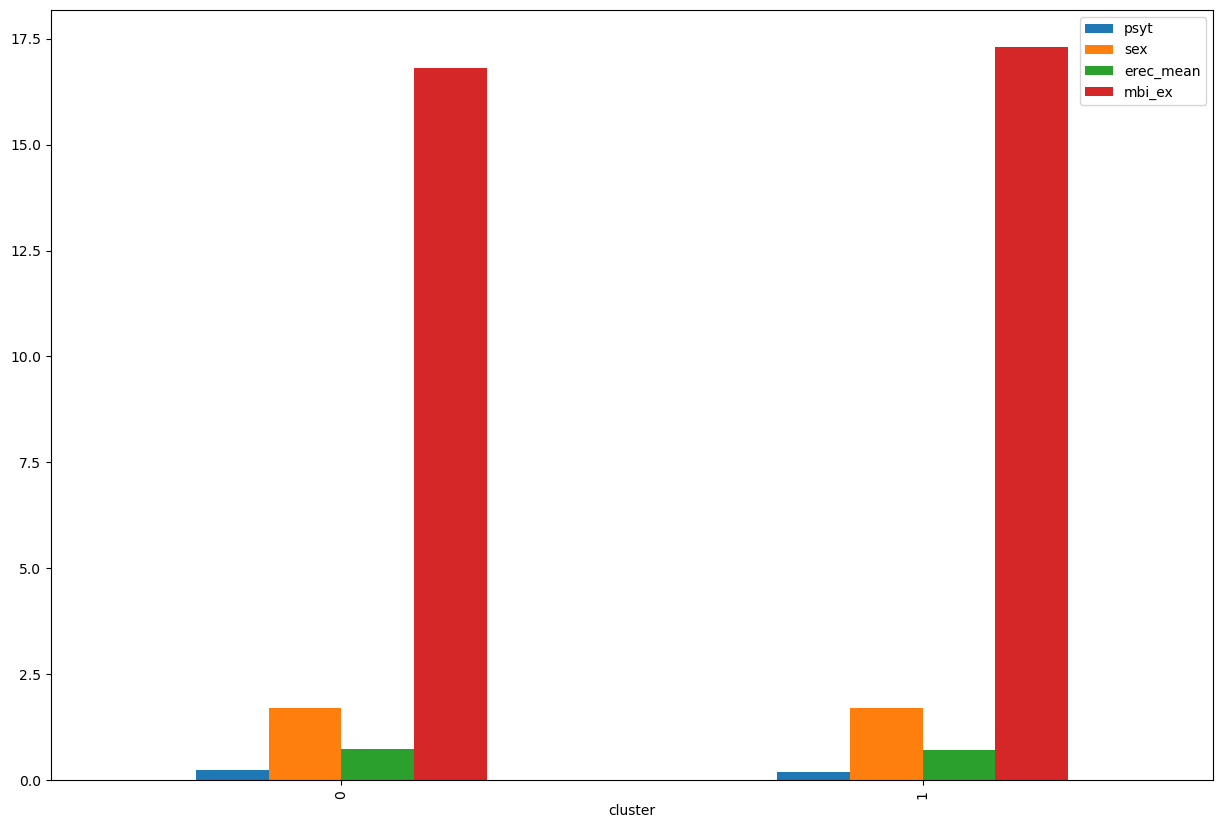

In [44]:
cluster_properties.plot(kind='bar', figsize=(15, 10))
plt.show()

##### Avaluació model

In [45]:
cesd_max = 56
stai_t_max = 77
threshold = (cesd_max+stai_t_max)*0.6
threshold

79.8

In [46]:
# fem Dataset per avaluar el model 
df_aval = df_clustered.copy() 
df_aval['target'] = y
df_aval

,psyt,sex,erec_mean,mbi_ex,cluster,target
0,0,1,0.738095,17,1,95
1,0,1,0.690476,14,0,40
2,0,2,0.690476,24,0,98
3,0,2,0.833333,16,0,65
4,0,1,0.690476,22,0,60
...,...,...,...,...,...,...
881,0,1,0.619048,23,0,80
882,0,2,0.809524,17,0,67
883,0,1,0.547619,15,0,59
884,1,2,0.785714,22,0,91


In [47]:
# Filtrem les files amb 'target' superior a threshold
df_target_gt_threshold = df_aval[df_aval['target'] > threshold]

# Fem el recompte agrupant per 'cluster'
count_by_cluster = df_target_gt_threshold.groupby('cluster').size()

# Mostrem el resultat
print("Recompte estudiants que necessiten ajuda\n", count_by_cluster)

print("\nRecompte estudiants totals en cluster\n", total_cluster)

Recompte estudiants que necessiten ajuda
 cluster
0    151
1     28
dtype: int64

Recompte estudiants totals en cluster
 cluster
0    773
1    113
dtype: int64


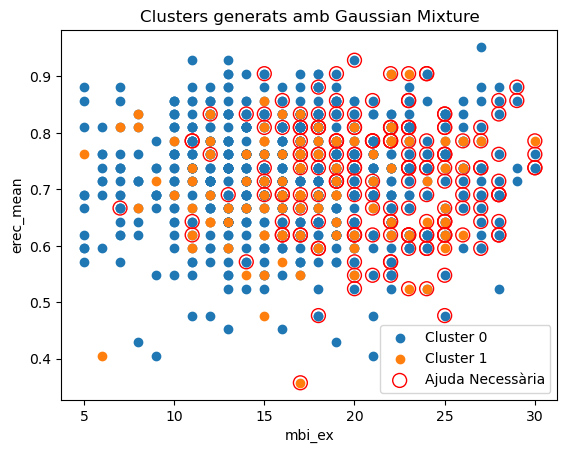

In [48]:
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['erec_mean'], label=f'Cluster {i}')

# Plot dels punts que superen el llindar amb marques diferents (per exemple, cercles buits)
plt.scatter(df_target_gt_threshold['mbi_ex'], df_target_gt_threshold['erec_mean'], label='Ajuda Necessària', facecolors='none', edgecolors='r', marker='o', s=100)

plt.title('Clusters generats amb Gaussian Mixture')
plt.xlabel('mbi_ex')
plt.ylabel('erec_mean')
plt.legend()
plt.show()

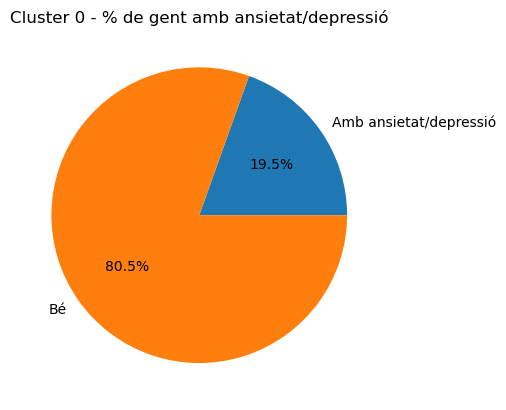

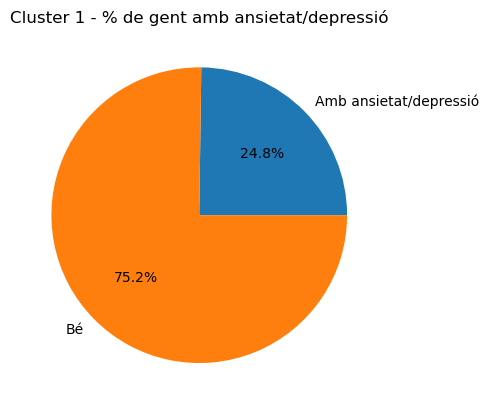

In [49]:
labels = 'Amb ansietat/depressió', 'Bé'
dades = []
for c in range(n_grups):
    resta = total_cluster[c] - count_by_cluster[c]
    dades.append([count_by_cluster[c], resta])

for i, d in enumerate(dades):
    fig, ax = plt.subplots()
    ax.pie(d, labels=labels, autopct='%1.1f%%')
    ax.set_title(f'Cluster {i} - % de gent amb ansietat/depressió')
    plt.show()

### Utilització de les característiques rellevants
Com a característiques rellevants fem servir aquelles que tenen coeficient major a **0.100000** amb LinearRegression.
* 'psyt'
* 'sex'
* 'erec_mean'
* 'mbi_ex'
* 'qcae_aff'
* 'age'
* 'mbi_cy'
* 'stud_h'

Fent 3 agrupacions per determinar si:
* necessiten assitència mèdica
* recomanable tenir assitència mèdica
* no necessiten assitència mèdica  

In [75]:
import pandas as pd

df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis = 1)
df['target'] = df['stai_t'] + df['cesd']
df = df.drop(['stai_t', 'cesd'], axis=1)
X = df.drop('target', axis=1)
y = df['target']

In [76]:
X_lr = X[['psyt', 'sex', 'erec_mean', 'mbi_ex', 'qcae_aff', 'age', 'mbi_cy', 'stud_h']]

In [82]:
n_grups=3
model = KMeans(n_clusters=n_grups)
clusters = model.fit_predict(X)

c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [83]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

n_grups = 3
model_gm = GaussianMixture(n_components=n_grups)
clusters = model_gm.fit_predict(X_lr)

c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [84]:
df_clustered = X_lr.copy() 
df_clustered['cluster'] = clusters 
df_clustered.head(5) 

,psyt,sex,erec_mean,mbi_ex,qcae_aff,age,mbi_cy,stud_h,cluster
0,0,1,0.738095,17,27,18,13,56,0
1,0,1,0.690476,14,37,26,11,20,0
2,0,2,0.690476,24,39,21,7,36,0
3,0,2,0.833333,16,33,21,10,51,0
4,0,1,0.690476,22,28,21,14,22,0


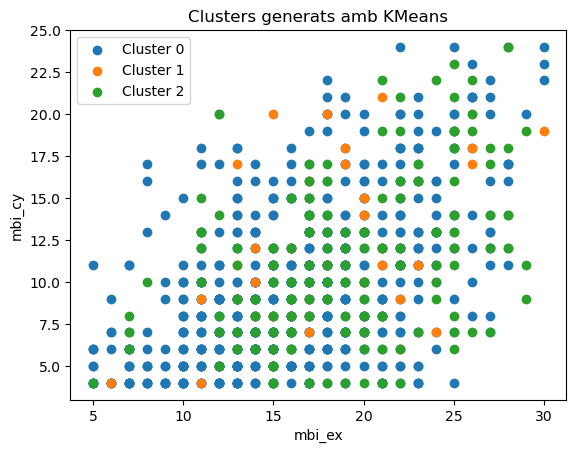

In [85]:
# Plot dels punts amb diferents colors segons el cluster al qual pertanyen
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['mbi_cy'], label=f'Cluster {i}')

plt.title('Clusters generats amb KMeans')
plt.xlabel('mbi_ex')
plt.ylabel('mbi_cy')
plt.legend()
plt.show()

In [86]:
# Grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('cluster')
cluster_properties = cluster_grouped.mean()

# Printing the properties of each cluster (mean values of the variables)
print(cluster_properties)

         psyt       sex  erec_mean     mbi_ex   qcae_aff        age  \
cluster                                                               
0         0.0  1.655022   0.719970  16.377001  34.427948  22.356623   
1         1.0  1.083333   0.724206  18.194444  33.722222  23.833333   
2         1.0  2.000000   0.719982  18.699387  36.521472  22.177914   

            mbi_cy     stud_h  
cluster                        
0         9.719068  25.572052  
1        12.166667  25.861111  
2        11.134969  23.969325  


In [87]:
# Getting the number of patients in each cluster
total_cluster = cluster_grouped.size()
total_cluster

cluster
0    687
1     36
2    163
dtype: int64

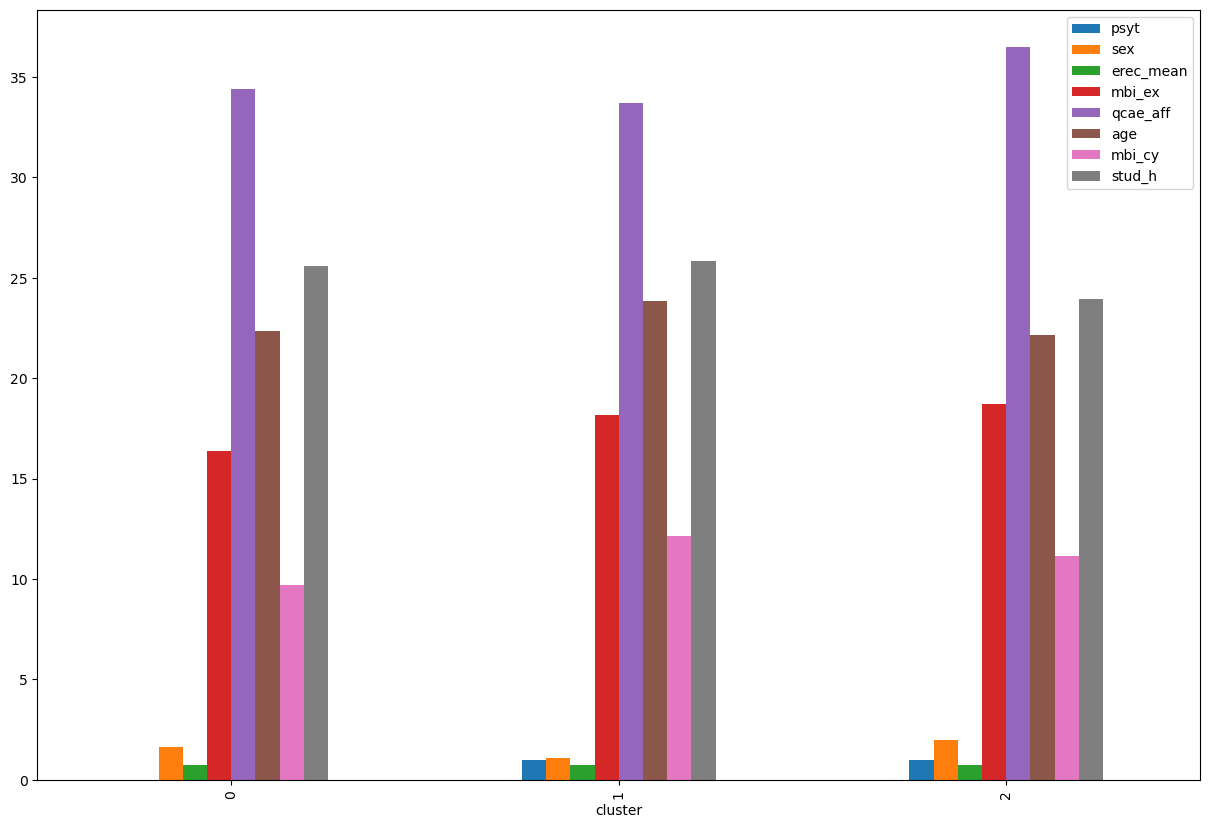

In [88]:
cluster_properties.plot(kind='bar', figsize=(15, 10))
plt.show()

#### Avaluació model

In [89]:
cesd_max = 56
stai_t_max = 77
threshold1 = (cesd_max+stai_t_max)*0.33
print("threshold1", threshold1)
threshold2 = (cesd_max+stai_t_max)*0.66
print("threshold2", threshold2)

threshold1 43.89
threshold2 87.78


In [90]:
# fem Dataset per avaluar el model 
df_aval = df_clustered.copy() 
df_aval['target'] = y
df_aval

,psyt,sex,erec_mean,mbi_ex,qcae_aff,age,mbi_cy,stud_h,cluster,target
0,0,1,0.738095,17,27,18,13,56,0,95
1,0,1,0.690476,14,37,26,11,20,0,40
2,0,2,0.690476,24,39,21,7,36,0,98
3,0,2,0.833333,16,33,21,10,51,0,65
4,0,1,0.690476,22,28,21,14,22,0,60
...,...,...,...,...,...,...,...,...,...,...
881,0,1,0.619048,23,39,21,4,45,0,80
882,0,2,0.809524,17,40,20,5,13,0,67
883,0,1,0.547619,15,31,19,8,50,0,59
884,1,2,0.785714,22,39,24,15,20,2,91


In [91]:
# Filtrem les files amb 'target' superior a threshold
df_target_gt_threshold1 = df_aval[df_aval['target'] < threshold1]
df_target_gt_threshold2 = df_aval[(df_aval['target'] > threshold1) & (df_aval['target'] < threshold2)]
df_target_gt_threshold3 = df_aval[df_aval['target'] > threshold2]

# Fem el recompte agrupant per 'cluster'
count_by_cluster1 = df_target_gt_threshold1.groupby('cluster').size()
count_by_cluster2 = df_target_gt_threshold2.groupby('cluster').size()
count_by_cluster3 = df_target_gt_threshold3.groupby('cluster').size()

# Mostrem els resultats
print("Recompte estudiants que NO necessiten ajuda\n", count_by_cluster1)
print("\nRecompte estudiants recomanable rebre ajuda\n", count_by_cluster2)
print("\nRecompte estudiants que SÍ necessiten ajuda\n", count_by_cluster3)

print("\nRecompte estudiants totals en cluster\n", total_cluster)

Recompte estudiants que NO necessiten ajuda
 cluster
0    194
1      2
2     13
dtype: int64

Recompte estudiants recomanable rebre ajuda
 cluster
0    438
1     27
2    100
dtype: int64

Recompte estudiants que SÍ necessiten ajuda
 cluster
0    55
1     7
2    50
dtype: int64

Recompte estudiants totals en cluster
 cluster
0    687
1     36
2    163
dtype: int64


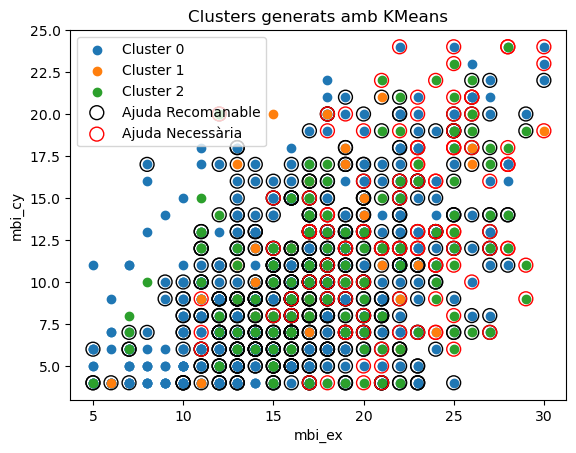

In [93]:
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['mbi_cy'], label=f'Cluster {i}')

# Plot dels punts que superen el llindar amb marques diferents (per exemple, cercles buits)
plt.scatter(df_target_gt_threshold2['mbi_ex'], df_target_gt_threshold2['mbi_cy'], label='Ajuda Recomanable', facecolors='none', edgecolors='black', marker='o', s=100)
plt.scatter(df_target_gt_threshold3['mbi_ex'], df_target_gt_threshold3['mbi_cy'], label='Ajuda Necessària', facecolors='none', edgecolors='r', marker='o', s=100)

plt.title('Clusters generats amb KMeans')
plt.xlabel('mbi_ex')
plt.ylabel('mbi_cy')
plt.legend()
plt.show()

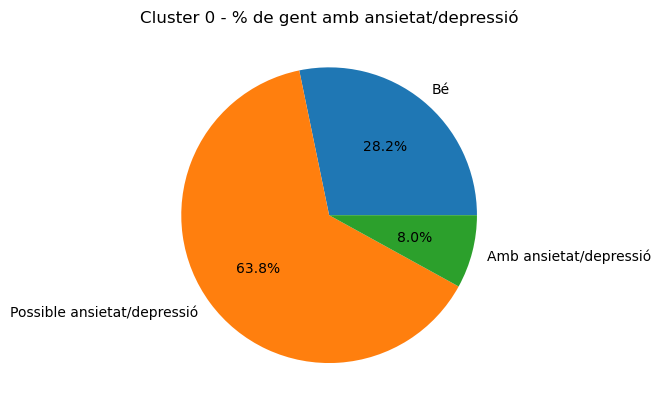

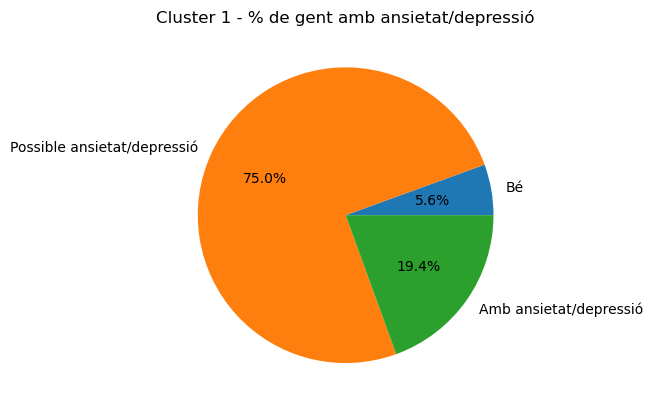

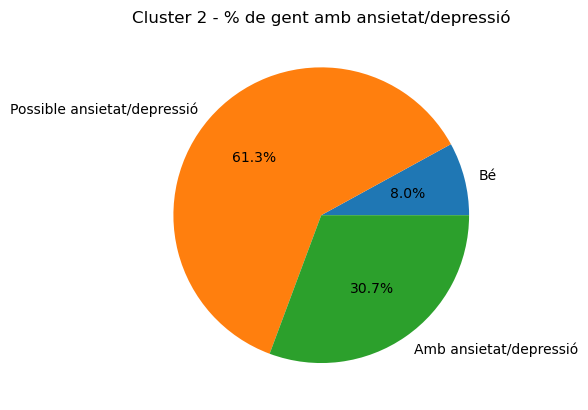

In [94]:
labels = 'Bé', 'Possible ansietat/depressió', 'Amb ansietat/depressió'
dades = []
for c in range(n_grups):
    dades.append([count_by_cluster1[c], count_by_cluster2[c], count_by_cluster3[c]])

for i, d in enumerate(dades):
    fig, ax = plt.subplots()
    ax.pie(d, labels=labels, autopct='%1.1f%%')
    ax.set_title(f'Cluster {i} - % de gent amb ansietat/depressió')
    plt.show()